## Wine Quality 

https://archive.ics.uci.edu/ml/datasets/wine+quality. Он содершит в себе химические характеристики напитка и оценку, которую выставила ему коммиссия из нескольких сомелье. 
Датасет имеет 11 параметров вина (результаты обычных физико-химических тестов):

    1 - Фиксированная кислотность
    2 - Летучая кислотность
    3 - Содержание лимонной кислоты
    4 - Остаточный сахар
    5 - Содержание хлоридов
    6 - Содержание свободного диоксида серы
    7 - Общее содержание диоксида серы
    8 - Плотность
    9 - Кислотность pH
    10 - Содержание сульфатов
    11 - Градус алкоголя

И столбец оценки вина:

    12 - Качество (оценка в диапазоне от 0 до 10)



In [12]:
# Импортируем наши стандартные библиотеки
from copy import deepcopy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

### Подготовка данных и EDA

In [13]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
897,7.1,0.590,0.01,2.3,0.080,27.0,43.0,0.99550,3.42,0.58,10.7,6
141,8.3,0.715,0.15,1.8,0.089,10.0,52.0,0.99680,3.23,0.77,9.5,5
1237,7.1,0.750,0.01,2.2,0.059,11.0,18.0,0.99242,3.39,0.40,12.8,6
1284,7.0,0.420,0.19,2.3,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,5
1462,6.8,0.640,0.03,2.3,0.075,14.0,31.0,0.99545,3.36,0.58,10.4,6
803,7.7,0.560,0.08,2.5,0.114,14.0,46.0,0.99710,3.24,0.66,9.6,6
615,9.6,0.600,0.50,2.3,0.079,28.0,71.0,0.99970,3.50,0.57,9.7,5
959,8.0,0.590,0.05,2.0,0.089,12.0,32.0,0.99735,3.36,0.61,10.0,5
103,8.1,0.575,0.22,2.1,0.077,12.0,65.0,0.99670,3.29,0.51,9.2,5
670,6.9,0.400,0.24,2.5,0.083,30.0,45.0,0.99590,3.26,0.58,10.0,5


In [14]:
# Проверим есть ли в наших данных пропуски и заодно посомтрим на типы данных при помощи метода info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
# Статистики каждого признака 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
X = df.drop(columns=["quality"])
y = df["quality"]

Уникальные оценки: [5 6 7 4 8 3]



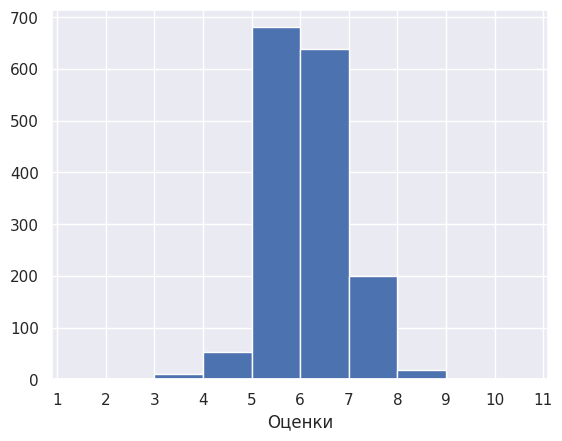

In [17]:
# Посмотрим уникальные значения (unique) гистограммой
# бины [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

print(f"Уникальные оценки: {y.unique()}\n")
y.hist(bins=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.xlabel("Оценки")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plt.xlim(0.9, 11.1)
plt.show()

In [84]:
#стратификация по таргету,
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)
# Посмотрим на размеры получившегося обучающего датасета
X_train.shape

(1199, 11)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


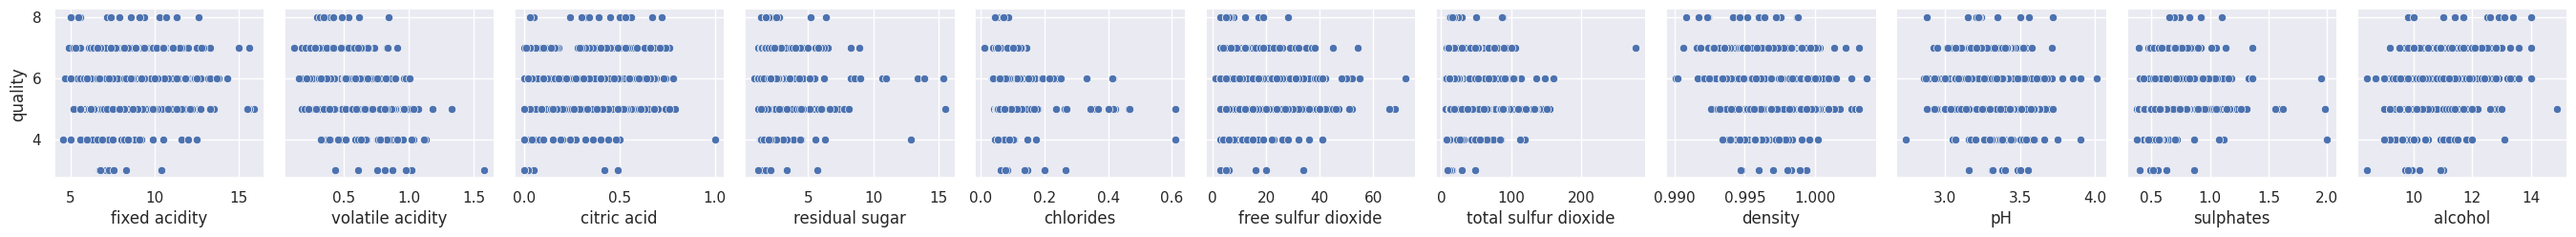

In [19]:
# Построим график зависимости оценки вина от каждого из признаков на обучающей части
X_train_plot = deepcopy(X_train)
X_train_plot["quality"] = y_train
sns.pairplot(
    X_train_plot,
    x_vars=X_train.columns,
    y_vars=["quality"],
)


plt.show()

In [20]:
# Прежде чем переходить к этапу построения модели необходимо понять какими метриками мы будем оценивать работу нашего алгоритма
from sklearn.metrics import max_error, mean_absolute_error

### Решение задачи при помощи дерева принятия решения

[Документация алгоритма](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)

In [21]:
# Импортируем класс DecisionTreeRegressor из модуля tree библиотеки sklear
from sklearn.tree import DecisionTreeRegressor

#### Бейзлайн (дерево решений ) Что бы не было переобучения ограничим глубину дерева

In [39]:
# Создадим объект класса DecisionTreeRegressor с max_depth равным числу (например 5)
DTR = DecisionTreeRegressor(max_depth=5)

# Обучим его на обучающей части датасета при помощи метода fit
DTR.fit(X_train, y_train)

# Получим предсказание нашего дерева при помощи метода predict на обучающем и тестовом датасете
y_DTR_train_predict = DTR.predict(X_train)
y_DTR_test_predict = DTR.predict(X_test)

# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_DTR_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_DTR_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_DTR_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_DTR_test_predict)}")

TRAIN
MAX ERROR: 2.2442396313364057
MAE:       0.4496686336604965
TEST
MAX ERROR: 4.0
MAE:       0.5184367042205742
[CV 1/3] END max_depth=1, min_samples_leaf=1;, score=(train=-0.558, test=-0.554) total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=2;, score=(train=-0.568, test=-0.592) total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=2;, score=(train=-0.579, test=-0.575) total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=3;, score=(train=-0.558, test=-0.554) total time=   0.0s
[CV 2/3] END max_depth=1, min_samples_leaf=3;, score=(train=-0.568, test=-0.592) total time=   0.0s
[CV 1/3] END max_depth=1, min_samples_leaf=4;, score=(train=-0.558, test=-0.554) total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=4;, score=(train=-0.579, test=-0.575) total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=5;, score=(train=-0.579, test=-0.575) total time=   0.0s
[CV 3/3] END max_depth=1, min_samples_leaf=6;, score=(train=-0.579, test=-0.575) tot

#### Подбор параметров при помощи `GridSearchCV`

In [23]:
# Импортируем GridSearchCV
from sklearn.model_selection import GridSearchCV

In [24]:
# Воспользуем функцией GridSearchCV
# В качестве определения "лучшей" модели выберем mean_absolute_error
# min_samples_leaf этот параметр определяет минимальное количество образцов (наблюдений), 
# которые должны находиться в каждом листе дерева.Если условие выполняется, разделение не производится, и узел становится листом.

grid = GridSearchCV(
            DecisionTreeRegressor(),                # Алгоритм, в котором будем подбирать параметры
            param_grid = {                          # Сетка параметров в виде словаря
                'max_depth': range(1, 8),
                'min_samples_leaf': range(1, 8),
            },
            scoring = 'neg_mean_absolute_error',    # Какие метрики будут считаться 
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            verbose = 4 ,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 8)},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=4)

In [25]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid.best_score_}")
print(f"Лучшие параметры: {grid.best_params_}")

Лучшая метрика:   -0.5160195633252206
Лучшие параметры: {'max_depth': 5, 'min_samples_leaf': 4}


In [26]:
# Получим предсказание нашего лучшего дерева (хранится в best_estimator_) при помощи метода predict на обучающем и тестовом датасете
y_GS_train_predict = grid.best_estimator_.predict(X_train)
y_GS_test_predict = grid.best_estimator_.predict(X_test)

# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_GS_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_GS_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_GS_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_GS_test_predict)}")

TRAIN
MAX ERROR: 2.164835164835165
MAE:       0.45706038316245456
TEST
MAX ERROR: 2.7142857142857144
MAE:       0.49923651395326973


Видим, что метрики действительно улучшились как на обучающем, так и на валидационном датасете.

#### Отрисовка работы лучшего решающего дерева.
#### Для интерпритации


In [27]:
# Импортируем функцию plot_tree из модуля tree библиотеки sklearn
from sklearn.tree import plot_tree

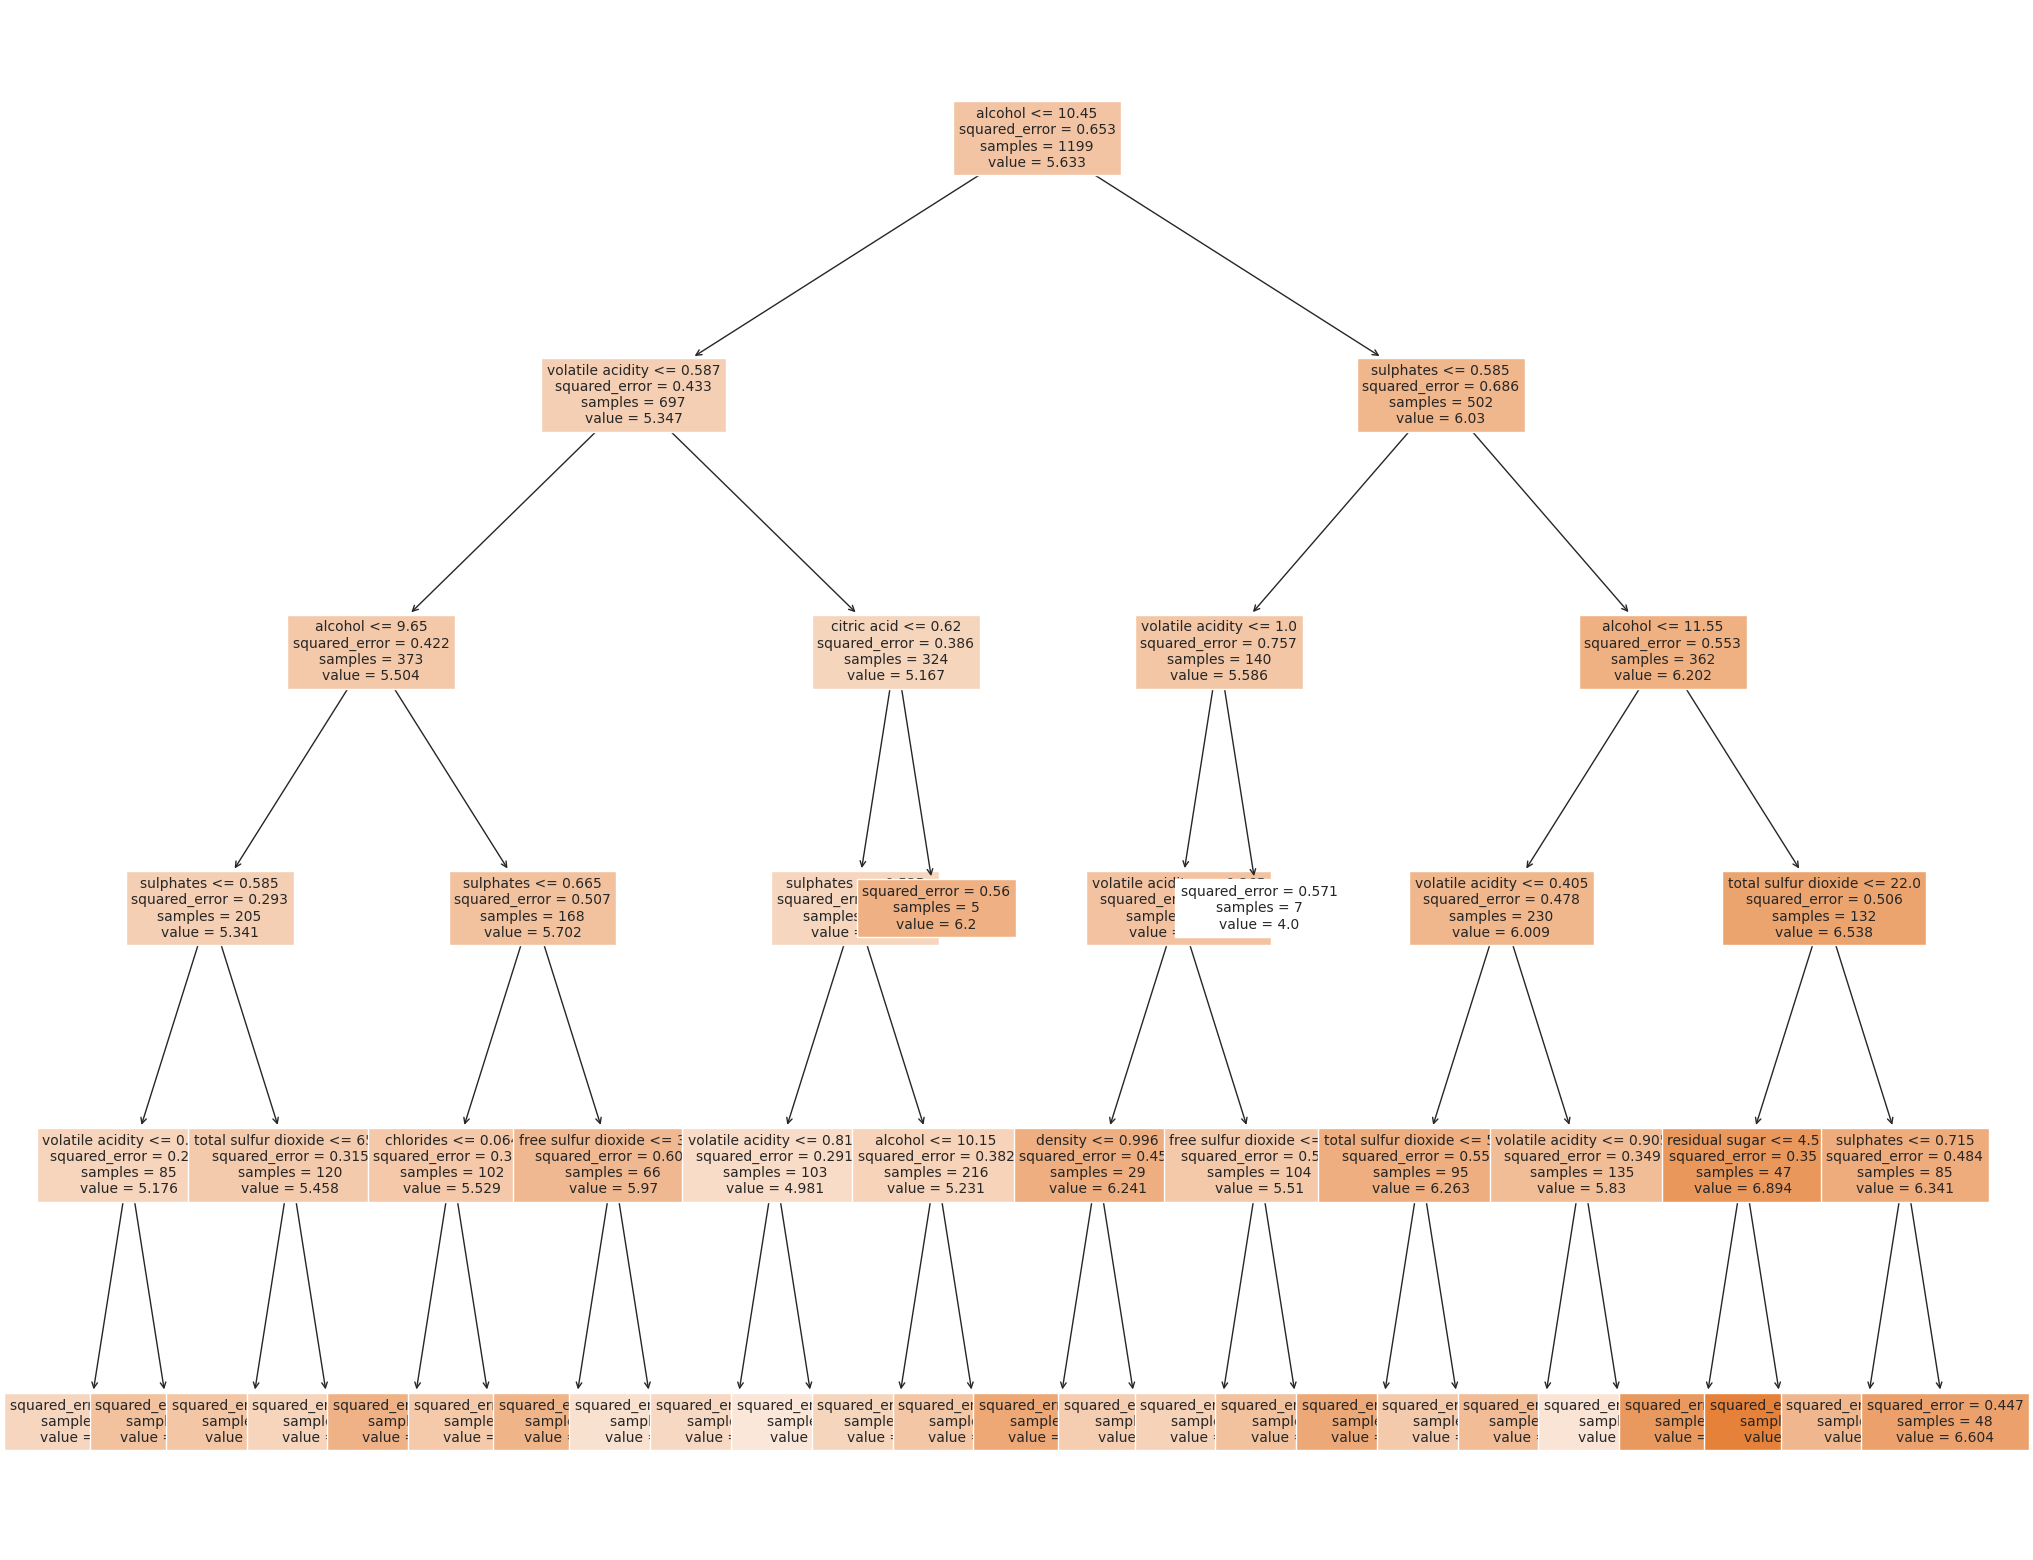

In [28]:
# Нарисуем лучшее дерево из сети

fig = plt.figure(figsize=(25,20))

_ = plot_tree(
        grid.best_estimator_, 
        feature_names = X_train.columns,  
        class_names = y_train.name,
        filled = True,
        fontsize = 10
    )

### Случайный лес

In [29]:
# Импортируем класс RandomForestRegressor 
from sklearn.ensemble import RandomForestRegressor

#### Бейзлайн модели случайного леса

In [30]:
# Создадим объект RandomForestRegressor
RFR = RandomForestRegressor()

# Обучим
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
# Получим предсказание нашего случайного леса при помощи метода predict на обучающем и тестовом датасете
y_RFR_train_predict = RFR.predict(X_train)
y_RFR_test_predict = RFR.predict(X_test)

In [32]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_RFR_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_RFR_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_RFR_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_RFR_test_predict)}")

TRAIN
MAX ERROR: 1.0199999999999996
MAE:       0.16140116763969972
TEST
MAX ERROR: 2.45
MAE:       0.38777500000000004


Видим, что результаты на голову выше обычного дерева решений, но также мы видим, что у нас есть переобучение.

### Подбор параметров при помощи `RandomizedSearchCV`,который перебирает не все возможные комбинации(GridSearchCV), а заданное число случайных.

Параметры Случайного леса для оптимизации.

У нас есть:

* Число деревьев в лесе (`n_estimators`) -- этот параметр просто нужно выбрать достаточно большим
* Максимальное число признаков у дерева (`max_features`) -- это самый важный параметр.
* Максимальная глубина деревьев (`max_depth`) -- желательно не ограничивать, но это очень ресурсоемко, поэтому нужн оподобрать достаточно глубкие, но все же органиченные.
* Минимальное число объектов в вершине для расщепления (`min_samples_split`) -- подбирается исходя из данных.

То есть у нас есть сложный алгоритм (в `n_estimators` раз сложнее решающего дерева) и 3 параметра для подбора. Даже с быстрым `GridSearchCV` это будет долго.

In [33]:
# Импортируем RandomizedCV из модуля model_selection библиотеки sklearn
from sklearn.model_selection import RandomizedSearchCV

In [165]:
# В качестве определения "лучшей" метрики выберем mean_absolute_error

grid = RandomizedSearchCV(
            RandomForestRegressor(),                # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(3, 10),
                'min_samples_split': range(3, 9),
                'n_estimators':[100,150,200],
                'max_features': range(3, 11)
            },
            scoring = 'neg_mean_absolute_error',    # Какие метрики будут считаться (Почему "neg_..."?)
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=16,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 3,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=16,
                   n_jobs=-1,
                   param_distributions={'max_depth': range(3, 10),
                                        'max_features': range(3, 11),
                                        'min_samples_split': range(3, 9),
                                        'n_estimators': [100, 150, 200]},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=3)

In [166]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику

print(f"Лучшая метрика:   {grid.best_score_}")

Лучшая метрика:   -0.4734263724976843


In [167]:
print(f"Лучшие параметры: {grid.best_params_}")

Лучшие параметры: {'n_estimators': 150, 'min_samples_split': 4, 'max_features': 10, 'max_depth': 9}


In [169]:
# Получим предсказание нашего лучшего дерева (хранится в best_estimator_) при помощи метода predict на обучающем и тестовом датасете
y_GS_train_predict = grid.best_estimator_.predict(X_train)
y_GS_test_predict = grid.best_estimator_.predict(X_test)

# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма
print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_GS_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_GS_train_predict)}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_GS_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_GS_test_predict)}")

TRAIN
MAX ERROR: 1.3542917282455678
MAE:       0.28539472459209314
TEST
MAX ERROR: 2.397721364403976
MAE:       0.42378830778371984


Кросвалидация по фолдам

In [170]:
from sklearn.model_selection import cross_validate
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer#, mean_absolute_error, max_error

model = grid.best_estimator_ #RandomForestRegressor(n_estimators=150,max_depth=21, min_samples_split=2, max_features=5)

# Определяем метрики, которые хотим измерять
scoring = {
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'max_error': make_scorer(max_error, greater_is_better=False)
}

# Проводим кросс-валидацию с 5 фолдами
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

# Выводим результаты
print("Mean MAE across folds:", -cv_results['test_neg_mean_absolute_error'].mean())
print("Mean Max Error across folds:", -cv_results['test_max_error'].mean())

# Этот код использует рандомизированный лес с определенными параметрами и проводит кросс-валидацию с использованием метрик MAE и Max Error. Отрицательные значения связаны с тем, что в sklearn чем меньше значение метрики, тем лучше, а метрики, которые мы определили, измеряются так, что большие значения соответствуют лучшей производительности модели.
# Обобщающие метрики - это те, которые оценивают производительность модели на новых, неизвестных данных. В данном случае, метрика, измеряющая MAE и Max Error на кросс-валидации, дает представление о том, как модель может справиться с новыми данными вне обучающего набора.


Mean MAE across folds: 0.47011440888116035
Mean Max Error across folds: 2.262848785431891
